<a href="https://colab.research.google.com/github/Ramubala/face-recognition/blob/main/FaceVerification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
#!rm -rf '/content/data' 
# !rm -rf '/content/annotations'

In [3]:
# !mkdir data
# !mkdir annotations
# !tar zxvf '/content/drive/MyDrive/datasets/originalPics.tar.gz' -C '/content/data/' ;
# !tar zxvf '/content/drive/MyDrive/datasets/FDDB-folds.tgz' -C '/content/annotations/';

In [4]:
# import glob
# file_list = [file for file in glob.glob(r'/content/annotations/FDDB-folds/*-ellipseList.txt',recursive=True)]
# train_files, test_files = file_list[:9],[file_list[9]]
# print(train_files, test_files)

In [5]:
#custom_train_dataset[2]

In [6]:
# def per_person_stats(source_txt: str):
#   stats_dict=dict()
#   with open(source_txt,'r') as f:
#     data = f.readlines()
#     for i in range(1, len(data)):
#       line = data[i].strip().split("\t")
#       stats_dict[line[0]] = int(line[1])
#   f.close()
#   return stats_dict

In [7]:
# def pick_train_pairs(_dict, num_per_sample, num_negative_faces_per_sample):
#   if num_per_sample!=3:
#     raise Exception("only 3 per sample supported by algorithm")
#   allfaces = list(_dict.keys())
#   data = []
#   for key in allfaces:
#     # anchor and postive example
#     facepath = '/content/data/lfw-py/lfw_funneled/{}'.format(key)
#     available_images = [file for file in glob.glob(facepath+'/*.jpg')]
#     num_available_images = _dict[key]
#     num_achor_postive_pairs = num_available_images*(num_available_images-1)
#     if num_achor_postive_pairs==0:
#       combinations = [(available_images[0],available_images[0])]
#     else:
#       combinations = list(itertools.combinations(available_images, 2))

#     # negative face
#     possible_choices = [v for v in allfaces if v != key]
#     negative_examples = random.sample(possible_choices, num_negative_faces_per_sample)
#     for negative_example in negative_examples:
#       negfacepath = '/content/data/lfw-py/lfw_funneled/{}'.format(negative_example)
#       available_images = [file for file in glob.glob(negfacepath+'/*.jpg')]
#       neg_imgpath = random.choice(available_images)

#       for tuple_el in combinations:
#         data.append((tuple_el[0],tuple_el[1],neg_imgpath))
#   return data  

In [8]:
# train_txt_file = '/content/data/lfw-py/peopleDevTrain.txt'
# test_txt_file = '/content/data/lfw-py/peopleDevTest.txt'
# train_stats = per_person_stats(train_txt_file)
# test_stats = per_person_stats(test_txt_file)

In [9]:
#test_stats.keys() & train_stats.keys()

In [10]:
# train_data = pick_train_pairs(train_stats, 3, 5)

In [11]:
# !pip install -q condacolab
# import condacolab
# condacolab.install()
# !conda install cudnn=8.3.2

# VERSION = "20200318" #@param ["20200318","nightly", "xrt==1.15.0"]
# !curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
# !python pytorch-xla-env-setup.py --version $VERSION

In [12]:
!pip install vit-pytorch pytorch-lightning
import torchvision
import torch
import os
import glob
import numpy as np
import itertools
import random
import imutils
random.seed(42)
from torch.utils.data import DataLoader,Dataset,Sampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pytorch_lightning as pl
# import torch_xla
# import torch_xla.core.xla_model as xm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.6/715.6 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 23.3 MB/s eta 0:00:00


In [13]:
# transformation = transforms.Compose([
#                                  transforms.ToTensor(),
#                                  #transforms.Normalize((mean,), (std,))
#                              ])

# train_dataset = torchvision.datasets.LFWPeople('/content/data/',split='train',download=True,transform=transformation)
# test_dataset = torchvision.datasets.LFWPeople('/content/data/',split='test',download=True,transform=transformation)

#train_dataset = torchvision.datasets.MNIST('/content/data/',train=True,download=True)
#test_dataset = torchvision.datasets.MNIST('/content/data/',train=False,download=True)
#mean, std = 0.28604059698879553, 0.35302424451492237

# train_dataset = torchvision.datasets.FashionMNIST('./content/data/FashionMNIST', train=True, download=True,
#                              transform=transforms.Compose([
#                                  transforms.ToTensor(),
#                                  transforms.Normalize((mean,), (std,))
#                              ]))
# test_dataset = torchvision.datasets.FashionMNIST('/content/data/FashionMNIST', train=False, download=True,
#                             transform=transforms.Compose([
#                                 transforms.ToTensor(),
#                                 transforms.Normalize((mean,), (std,))
#                             ]))

In [14]:
transformation = transforms.Compose([
                                 transforms.ToTensor()
                             ])

train_dataset = torchvision.datasets.LFWPeople('/content/data/',split='train',download=True,transform=transformation)
test_dataset = torchvision.datasets.LFWPeople('/content/data/',split='test',download=True,transform=transformation)

  0%|          | 0/243346528 [00:00<?, ?it/s]

Extracting /content/data/lfw-py/lfw-funneled.tgz to /content/data/lfw-py


  0%|          | 0/66403 [00:00<?, ?it/s]

  0%|          | 0/94727 [00:00<?, ?it/s]

Using downloaded and verified file: /content/data/lfw-py/lfw-funneled.tgz
Extracting /content/data/lfw-py/lfw-funneled.tgz to /content/data/lfw-py


  0%|          | 0/28334 [00:00<?, ?it/s]

Using downloaded and verified file: /content/data/lfw-py/lfw-names.txt


In [15]:
len(train_dataset)+len(test_dataset)

13233

In [16]:
images, labels = next(iter(DataLoader(train_dataset, 32, shuffle=False)))
grid_img = torchvision.utils.make_grid(images, nrow=5)

In [17]:
# find mean and std
train_dataloader = DataLoader(dataset=train_dataset, batch_size=64)

def get_mean_and_std(dataloader):
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0
    for data, _ in dataloader:
        # Mean over batch, height and width, but not over the channels
        channels_sum += torch.mean(data, dim=[0,2,3])
        channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
        num_batches += 1
    
    mean = channels_sum / num_batches

    # std = sqrt(E[X^2] - (E[X])^2)
    std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5

    return mean, std
  
mean, std = get_mean_and_std(train_dataloader)

In [18]:
transformation = transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize(tuple(mean.numpy()),tuple(std.numpy())),
                             ])

train_dataset = torchvision.datasets.LFWPeople('/content/data/',split='train',download=False,transform=transformation)
test_dataset = torchvision.datasets.LFWPeople('/content/data/',split='test',download=False,transform=transformation)

In [19]:
train_dataset[0][0].shape

torch.Size([3, 250, 250])

In [20]:
images, labels = next(iter(DataLoader(train_dataset, 32, shuffle=False)))
grid_img_after_transform = torchvision.utils.make_grid(images, nrow=5)

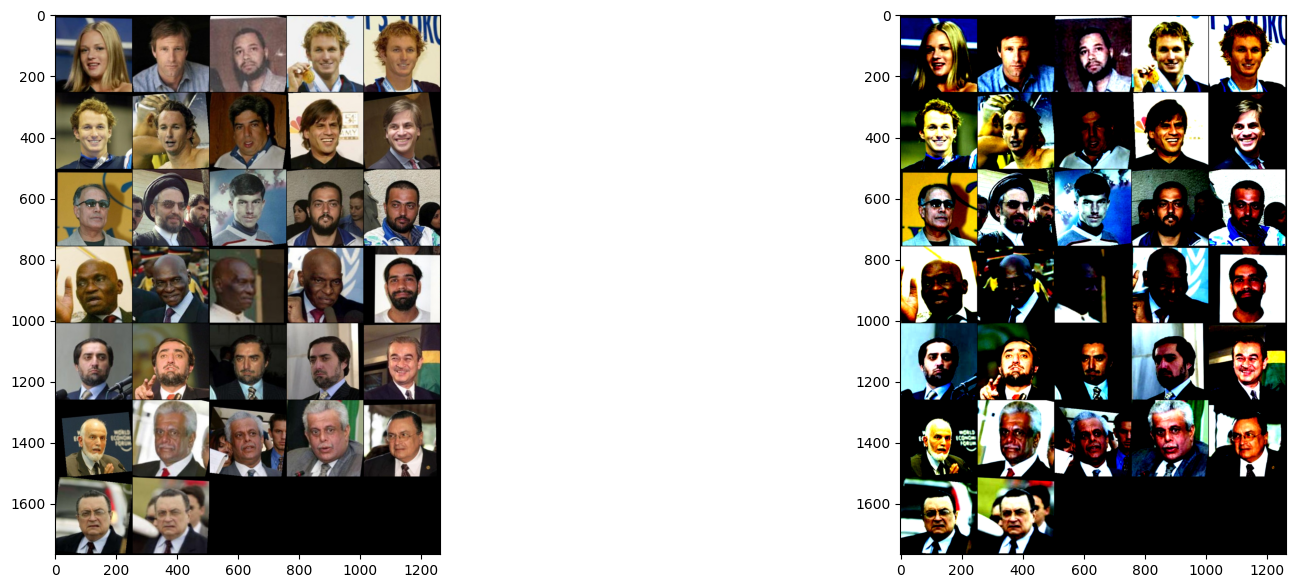

In [21]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
ax[0].imshow(grid_img.permute(1, 2, 0))
ax[1].imshow(grid_img_after_transform.permute(1, 2, 0))

In [22]:
from torch.utils.data.dataloader import BatchSampler
import gc

# This constructs a new dataset from src dataset with anchor-positive-negative triplet
# The length of samples from this loader would be upsampling_factor*len(src_dataset)
class CustomDataset(Dataset):
  def __init__(self, src_dataset, upsampling_factor=5):

    # input source dataset

    self.src_dataset = src_dataset 

    # get all source labels in srcc
    self.src_labels = np.array([src_dataset[i][1] for i in range(len(src_dataset))]) 
    self.labels = list(set(self.src_labels))
    self.label_to_index= {label: np.where(self.src_labels == label)[0]
                                     for label in self.labels}
    self.upsampling_factor = upsampling_factor

  def __len__(self):
      return self.upsampling_factor*len(self.src_dataset)

  def __getitem__(self, idx : int):
      # anchor image
      ref_dataset_index = int(idx/self.upsampling_factor)
      ref_train_image = self.src_dataset[ref_dataset_index]
      label = ref_train_image[1]

      # finding different but positive example
      possible_positive_choices = self.label_to_index[label]
      possible_positive_choices = [v for v in possible_positive_choices] #if v!=ref_dataset_index]
      choice = random.choice(possible_positive_choices)
      positive_train_image = self.src_dataset[choice]

      # finding negative example
      possible_neg_choices = [v for v in self.labels if v!= label]
      choice = random.choice(possible_neg_choices)
      choose_neg_idx = random.choice(self.label_to_index[choice])
      negative_train_image = self.src_dataset[choose_neg_idx]

      return (ref_train_image[0], positive_train_image[0], negative_train_image[0]), (ref_train_image[1], positive_train_image[1], negative_train_image[1])


_train_dataset = CustomDataset(train_dataset, 3)
_test_dataset = CustomDataset(test_dataset, 3)

In [23]:
len(_train_dataset), len(_test_dataset)

(28575, 11124)

In [24]:
# torch.save(_train_dataset, 'train.pt')
# torch.save(_test_dataset,'test.pt')

In [25]:
# class BatchSamplerUniform(Sampler):
#   def __init__(self, labels, n_classes, n_samples):
#     self.labels = labels
#     self.batch_size = n_classes*n_samples
#     self.unique_labels = list(set(labels))
#     self.n_classes = n_classes
#     self.n_samples = n_samples
#     self.labels_to_index_map = {label: np.where(self.labels == label)[0]
#                                       for label in self.unique_labels}
#     self.used_up_samples = {label: 0 for label in self.unique_labels}
#     self.count=0

#   def __iter__(self):
#     while self.count + self.batch_size < len(self.labels):
#       sampled_classes = np.random.choice(self.unique_labels, self.n_classes, replace=False)
#       indices = []
#       for label in sampled_classes:
#         available_indices = self.labels_to_index_map[label]
#         last_index_used = self.used_up_samples[label]
#         samples = available_indices[last_index_used:last_index_used+self.n_samples]
#         self.used_up_samples[label] = last_index_used+self.n_samples
#         if self.used_up_samples[label]+self.n_samples>len(available_indices):
#           np.random.shuffle(self.labels_to_index_map[label])
#           self.used_up_samples[label]=0
#         indices.extend(samples)
#       self.count+=self.batch_size
#       yield indices

#   def __len__(self):
#     return len(self.labels)//self.batch_size

In [26]:
kwargs = {'num_workers': 2, 'pin_memory': True}
train_dataloader = DataLoader(_train_dataset, batch_size=64, shuffle=False, **kwargs)#batch_sampler=BatchSamplerUniform(_train_dataset.src_labels, 10, 25), **kwargs)
test_dataloader = DataLoader(_test_dataset, batch_size=64, shuffle=False, **kwargs)

## Define models

In [27]:
import torch
import torch.nn as nn
from torch.nn.modules.pooling import MaxPool2d

In [28]:
# class BasicConv2d(nn.Module):
#   def __init__(self, in_channels, out_channels, kernel_size, stride ):
#     super().__init__()
#     self.model = nn.Sequential(
#         nn.Conv2d(in_channels=in_channels,out_channels=out_channels,kernel_size=kernel_size,stride=stride),
#         nn.BatchNorm2d(num_features=out_channels)
#     )
#     self.relu = nn.ReLU()

#   def forward(self,x):
#     return self.relu(self.model(x))


# self.conv_layers = nn.Sequential(
    #         nn.Conv2d(1, 64, kernel_size=3, padding=1),
    #         nn.ReLU(),
    #         nn.MaxPool2d(kernel_size=2, stride=2),
    #         nn.Conv2d(64, 128, kernel_size=3, padding=1),
    #         nn.ReLU(),
    #         nn.MaxPool2d(kernel_size=2, stride=2),
    #         nn.Conv2d(128, 256, kernel_size=3, padding=1),
    #         nn.ReLU(),
    #         nn.Conv2d(256, 256, kernel_size=3, padding=1),
    #         nn.ReLU(),
    #         nn.MaxPool2d(kernel_size=2, stride=2),
    #         nn.Conv2d(256, 512, kernel_size=3, padding=1),
    #         nn.ReLU(),
    #         nn.Conv2d(512, 512, kernel_size=3, padding=1),
    #         nn.ReLU(),
    #         nn.MaxPool2d(kernel_size=2, stride=2),
    #         nn.Conv2d(512, 512, kernel_size=3, padding=1),
    #         nn.ReLU(),
    #         nn.Conv2d(512, 512, kernel_size=3, padding=1),
    #         nn.ReLU(),
    #         nn.MaxPool2d(kernel_size=2, stride=2)
    #     )

    # self.conv_layers = nn.Sequential(
    #     BasicConv2d(in_channels=3,out_channels=64,kernel_size=5,stride=2),
    #     nn.MaxPool2d(kernel_size=3,stride=2),
    #     #BasicConv2d(in_channels=64,out_channels=64,kernel_size=1,stride=1),
    #     BasicConv2d(in_channels=64,out_channels=128,kernel_size=5,stride=1),
    #     nn.MaxPool2d(kernel_size=3,stride=2),
    #     #BasicConv2d(in_channels=192,out_channels=192,kernel_size=1,stride=1),
    #     BasicConv2d(in_channels=192,out_channels=384,kernel_size=3,stride=1),
    #     nn.MaxPool2d(kernel_size=3,stride=2),
    #     #BasicConv2d(in_channels=384,out_channels=384,kernel_size=1,stride=1),
    #     BasicConv2d(in_channels=384,out_channels=256,kernel_size=3,stride=1),
    #     BasicConv2d(in_channels=256,out_channels=256,kernel_size=1,stride=1),
    #     BasicConv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1),
    #     BasicConv2d(in_channels=256,out_channels=256,kernel_size=1,stride=1),
    #     BasicConv2d(in_channels=256,out_channels=256,kernel_size=3,stride=1),
    #     nn.MaxPool2d(kernel_size=3,stride=2),
    # )

    # self.fc_layers = nn.Sequential(
    #     nn.Linear(in_features=2*2*256,out_features=128),
    #     nn.Linear(in_features=128, out_features=2),
    #     #nn.Linear(in_features=32*128, out_features=1*128)
    # )


In [29]:
from vit_pytorch import ViT

class FaceSimilarity(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv_layers = ViT(
                      image_size = 250,
                      patch_size = 25,
                      num_classes = 128,
                      dim = 512,
                      depth = 2,
                      heads = 6,
                      mlp_dim = 1024,
                      dropout = 0.1,
                      emb_dropout = 0.1
                      )
    
  def forward(self,x):
    x = x.cuda()
    conv_output = self.conv_layers(x)
    conv_output = conv_output.view(conv_output.shape[0],-1)
    #l2_norm_output  =(linear_layers_output/(linear_layers_output.pow(2).sum(1, keepdim=True).sqrt())).squeeze(0)
    return conv_output.squeeze(0)

In [30]:
class TripletModel(nn.Module):
    def __init__(self):
      super().__init__()
      self.face_similarity = FaceSimilarity()
    
    def forward(self, anchor, positive, negative):
      rep_1 = self.face_similarity(anchor)
      rep_2 = self.face_similarity(positive)
      rep_3 = self.face_similarity(negative)
      return rep_1, rep_2, rep_3

    def get_embedding(self,x):
      return self.face_similarity.forward(x)

Define metrics

In [31]:
class TripletLoss(nn.Module):
  def __init__(self, alpha):
    super().__init__()
    self.margin = alpha

  def forward(self, embeddings, target_labels):
    distance_positive = (embeddings[:,0] - embeddings[:,1]).pow(2).sum(1)
    distance_negative = (embeddings[:,0] - embeddings[:,2]).pow(2).sum(1)
    loss = torch.nn.functional.relu(distance_positive - distance_negative + self.margin)
    accuracy = 100*(1-torch.count_nonzero(loss)/len(loss))
    return loss.mean(), accuracy

In [32]:
from itertools import combinations

class OnlineTripletLoss(nn.Module):
  def __init__(self, alpha):
    super().__init__()
    self.margin = alpha

  def pdist(self, vectors):
    distance_matrix = -2 * vectors.mm(torch.t(vectors)) + vectors.pow(2).sum(dim=1).view(1, -1) + vectors.pow(2).sum(
        dim=1).view(-1, 1)
    #distance_matrix = np.linalg.norm(vectors-b)
    return distance_matrix

  def hardest_negative(self, loss_values):
    hard_negative = np.argmax(loss_values)
    return hard_negative if loss_values[hard_negative] > 0 else None

  def random_hard_negative(self, loss_values):
    hard_negatives = np.where(loss_values > 0)[0]
    return np.random.choice(hard_negatives) if len(hard_negatives) > 0 else None

  def get_pairs_with_hard_negative(self, embeddings, target_labels):
    distance_matrix = self.pdist(embeddings)
    distance_matrix = distance_matrix.cpu()
    labels = target_labels.cpu().data.numpy()
    triplets = []

    for label in set(labels.flatten()):
        label_mask = (labels == label)
        label_indices = np.where(label_mask)[0]
        if len(label_indices) < 2:
            continue
        negative_indices = np.where(np.logical_not(label_mask))[0]
        anchor_positives = list(combinations(label_indices, 2))  # All anchor-positive pairs
        anchor_positives = np.array(anchor_positives)

        ap_distances = distance_matrix[anchor_positives[:, 0], anchor_positives[:, 1]]
        for anchor_positive, ap_distance in zip(anchor_positives, ap_distances):
            loss_values = ap_distance - distance_matrix[torch.LongTensor(np.array([anchor_positive[0]])), torch.LongTensor(negative_indices)] + self.margin
            loss_values = loss_values.data.cpu().numpy()
            hard_negative = self.random_hard_negative(loss_values)
            if hard_negative is not None:
                hard_negative = negative_indices[hard_negative]
                triplets.append([anchor_positive[0], anchor_positive[1], hard_negative])

    if len(triplets) == 0:
        triplets.append([anchor_positive[0], anchor_positive[1], negative_indices[0]])

    triplets = np.array(triplets)

    return torch.LongTensor(triplets)

  def forward(self, embeddings, target_labels):
    embeddings = torch.cat(embeddings,dim=1)
    for sub_list in target_labels:
      target_labels = torch.stack(sub_list,dim=0).T
    triplets = self.get_pairs_with_hard_negative(embeddings, target_labels)
    if embeddings.is_cuda:
             triplets = triplets.cuda()
    ap_distances = (embeddings[triplets[:, 0]] - embeddings[triplets[:, 1]]).pow(2).sum(1)  # .pow(.5)
    an_distances = (embeddings[triplets[:, 0]] - embeddings[triplets[:, 2]]).pow(2).sum(1)  # .pow(.5)
    loss = torch.nn.functional.relu(ap_distances - an_distances + self.margin)
    accuracy = 100*torch.count_nonzero(loss)/len(loss)

    return loss.mean(), accuracy

In [43]:
criterion = OnlineTripletLoss(alpha=1)

class LitModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.model = TripletModel()

    def forward(self, x):
        return self.model(*x)

    def training_step(self, batch, batch_idx):
        x, y = batch[0], batch[1]
        output = self(x)
        if type(output) not in (tuple, tuple):
            output = (output,)
        loss_inputs = output
        if y is not None:
            y = (y,)
            loss_inputs += y
        loss, accuracy = criterion(output, y)
        self.log("train_loss", loss, prog_bar=True, on_step=False, on_epoch=True) 
        self.log("train_acc", accuracy, prog_bar=True, on_step=False, on_epoch=True)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch[0], batch[1]
        output = self(x)
        if type(output) not in (tuple, tuple):
            output = (output,)
        loss_inputs = output
        if y is not None:
            y = (y,)
            loss_inputs += y
        loss, accuracy = criterion(output, y)
        self.log("val_loss", loss, prog_bar=True,on_step=False, on_epoch=True) 
        self.log("val_acc", accuracy, prog_bar=True, on_step=False, on_epoch=True) 
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(model.parameters(),lr=1e-3, weight_decay=1e-4) 

In [44]:
# def train_model(dataloader,model,optimizer,criterion):
#   model.train()
#   train_loss=0
#   classification_accuracy=0
#   for i, (input, target) in enumerate(dataloader):
#     optimizer.zero_grad()
#     output = model(*input)#.cuda()
#     if type(output) not in (tuple, tuple):
#        output = (output,)
#     loss_inputs = output
#     if target is not None:
#        target = (target,)
#        loss_inputs += target
#     loss, accuracy = criterion(output,target)
#     classification_accuracy+=accuracy
#     loss.backward()
#     train_loss+=loss
#     optimizer.step()
#   return train_loss/len(dataloader)#, classification_accuracy/len(dataloader)

In [45]:
# def eval_model(dataloader,model,optimizer,criterion):
#   model.eval()
#   val_loss=0
#   classification_accuracy=0
#   with torch.no_grad():
#     for i, (input, target) in enumerate(dataloader):
#       output = model(*input)#.cuda()
#       print()
#       if type(output) not in (tuple, tuple):
#         output = (output,)
#       loss_inputs = output
#       if target is not None:
#        target = (target,)
#        loss_inputs += target
#       loss, accuracy = criterion(output,target)
#       classification_accuracy+=accuracy
#       val_loss+=loss
#     return val_loss/len(dataloader)#, classification_accuracy/len(dataloader)

In [46]:
# def epoch_time(start_time, end_time):
#     elapsed_time = end_time - start_time
#     elapsed_mins = int(elapsed_time / 60)
#     elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
#     return elapsed_mins, elapsed_secs

In [47]:
# def fit(max_epochs, model, optimizer, criterion):
#   min_val_loss = float('inf')

#   for i in range(max_epochs):
#     start_time = time.time()

#     # train model
#     train_loss = train_model(train_dataloader, model, optimizer, criterion)
    
#     # val model loss
#     val_loss = eval_model(test_dataloader, model, optimizer, criterion)

#     end_time = time.time()

#     epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
#     print(f'Epoch: {i:02} | Time: {epoch_mins}m {epoch_secs}s')
#     print("Epoch {} elapsed, train_loss: {}, val_loss: {}".format(i,train_loss,val_loss))
#     if val_loss<min_val_loss:
#       min_val_loss = val_loss
#       torch.save(model, '/content/face_verification.pt')

In [49]:
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

logger = TensorBoardLogger(save_dir=os.getcwd(), version=1, name="lightning_logs")

early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=0.01, patience=3, verbose=False, mode="min")

checkpoint_callback = ModelCheckpoint(monitor="val_loss",save_top_k=1, save_last=True)

trainer = pl.Trainer(max_epochs=10, accelerator="gpu", logger=logger, 
                     callbacks=[checkpoint_callback,early_stop_callback])

model = LitModel()
trainer.fit(model, train_dataloaders=train_dataloader, val_dataloaders=test_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type         | Params
---------------------------------------
0 | model | TripletModel | 4.8 M 
---------------------------------------
4.8 M     Trainable params
0         Non-trainable params
4.8 M     Total params
19.050    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [50]:
best_model = LitModel.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)

In [51]:
import matplotlib.pyplot as plt

def plot_embeddings(embeddings, targets, xlim=None, ylim=None):
    plt.figure(figsize=(10,10))
    for i in range(100):
        inds = np.where(targets==i)[0]
        plt.scatter(embeddings[inds,0], embeddings[inds,1], alpha=0.5)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    #plt.legend(mnist_classes)

def extract_embeddings(dataloader, model):
    with torch.no_grad():
        model.eval()
        embeddings = np.zeros((len(dataloader.dataset), 2))
        labels = np.zeros(len(dataloader.dataset))
        k = 0
        for i, (images, target) in enumerate(dataloader):
            #if device=='cuda':
            #    images = images.cuda()
            embeddings[k:k+len(images[0])] = model.get_embedding(images[0]).data.cpu().numpy()
            labels[k:k+len(images[0])] = target[0].numpy()
            k += len(images[0])
    return embeddings, labels

In [52]:
train_embeddings_otl, train_labels_otl = extract_embeddings(train_dataloader, best_model)
val_embeddings_otl, val_labels_otl = extract_embeddings(test_dataloader, best_model)

AttributeError: ignored

In [ ]:
plot_embeddings(train_embeddings_otl, train_labels_otl)
plot_embeddings(val_embeddings_otl, val_labels_otl)